In [27]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
def get_dataframe(matrix, save_xlsx=False):
    with open(f"raw_data/matrix_{matrix}/{matrix}.bmerawdata") as f:
        j = json.load(f)
    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

    if save_xlsx:
        df.to_excel(f"raw_data/matrix_{matrix}/{matrix}.xlsx")

    return df

In [47]:
# df = get_dataframe(1, save_xlsx=True)

In [29]:
def build_sensor_data(df):
    df["Date"] = pd.to_datetime(
        df["Real time clock"],
        unit="s",
        utc=True).map(lambda x: x.tz_convert("Europe/Istanbul"))
    df["Date"] = df["Date"].dt.tz_localize(None)

    sensor_indexes = sorted(df["Sensor Index"].unique())

    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

    return sensors

In [30]:
def build_raw_data_pickle(save_pickle=False):
    sensor_data = {}
    for matrix in range(2):
        df = get_dataframe(matrix)
        sensor_data[f"mat_{matrix}"] = build_sensor_data(df)

    if save_pickle:
        with open("raw_sensor_data.pkl", "wb") as f:
            pickle.dump(sensor_data, f)

    return sensor_data

In [31]:
sensor_data = build_raw_data_pickle(save_pickle=True)

In [7]:
sensor_data["mat_0"][0][0]

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code,Date
10,0,355899974,12262,1740580581,20.929651,925.923828,25.782722,18875576.0,0,1,1,0,0,2025-02-26 17:36:21
104,0,355899974,31110,1740580600,22.129309,925.861938,20.336588,102400000.0,0,1,1,0,0,2025-02-26 17:36:40
190,0,355899974,49943,1740580619,22.840225,925.882629,18.705660,102400000.0,0,1,1,0,0,2025-02-26 17:36:59
270,0,355899974,68757,1740580638,23.452408,925.895630,17.928011,102400000.0,0,1,1,0,0,2025-02-26 17:37:18
350,0,355899974,87598,1740580657,24.000414,925.874512,17.408743,102400000.0,0,1,1,0,0,2025-02-26 17:37:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378455,0,355899974,84741742,1740665321,32.544319,925.780212,12.530609,102400000.0,0,1,1,0,0,2025-02-27 17:08:41
378537,0,355899974,84760572,1740665340,32.571476,925.745850,12.483052,102400000.0,0,1,1,0,0,2025-02-27 17:09:00
378626,0,355899974,84779563,1740665359,32.625786,925.737976,12.504763,102400000.0,0,1,1,0,0,2025-02-27 17:09:19
378713,0,355899974,84798387,1740665378,32.729473,925.734070,12.499303,102400000.0,0,1,1,0,0,2025-02-27 17:09:38


In [8]:
def plot_sensor(matrix, sensor_idx, sensor_data):
    plt.figure(figsize=(8, 4))
    plt.title(f"Matrix {matrix}, Sensor {sensor_idx}")
    plt.yscale("log")
    for hp_idx, val in sensor_data[f"mat_{matrix}"][sensor_idx].items():
        resistance = val["Resistance Gassensor"].values
        time_ms = val["Time Since PowerOn"].values
        plt.plot(time_ms, resistance, label=f"HP {hp_idx}")
    plt.legend()
    plt.show()

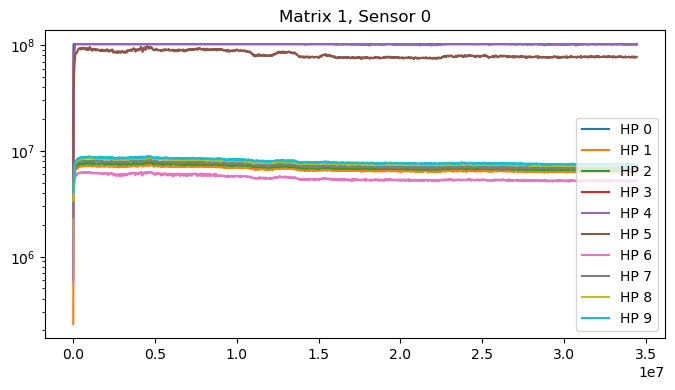

In [25]:
plot_sensor(1, 0, sensor_data)

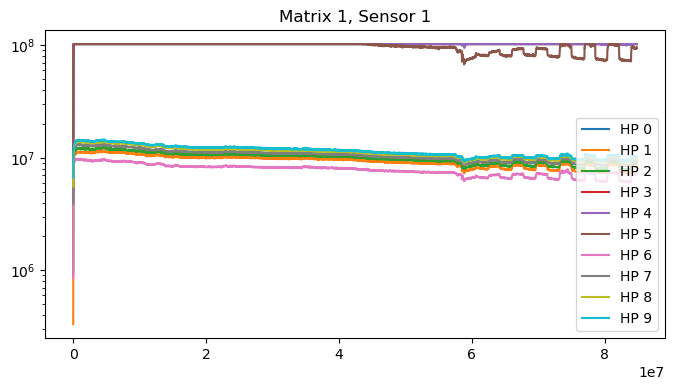

In [26]:
plot_sensor(1, 1, sensor_data)